In [ ]:
# Data Loading

In [61]:
!pip install -Uqq fastbook

In [62]:

import fastbook
fastbook.setup_book()
from fastbook import *

In [3]:
import os

In [ ]:
!pip install kaggle
# go to kaggle and install your unique api key - move this into the location

In [4]:
if 'apparel-dataset' not in os.listdir():
    if 'apparel-dataset.zip' not in os.listdir():
        print('Dataset has not been downloaded. Downloading now from kaggle')
        !kaggle datasets download -d kaiska/apparel-dataset
    # unzip
    !mkdir apparel-dataset
    !unzip apparel-dataset.zip -d ./apparel-dataset
# move dataset into the correct location
else:
    print("Dataset already loaded")

Dataset already loaded


In [ ]:
# Data Blocks

In [5]:
path = Path('apparel-dataset')

In [6]:
fns = get_image_files(path)
fns

(#16170) [Path('apparel-dataset/pink_skirt/000309.jpg'),Path('apparel-dataset/pink_skirt/000144.jpg'),Path('apparel-dataset/pink_skirt/000474.jpg'),Path('apparel-dataset/pink_skirt/000044.jpg'),Path('apparel-dataset/pink_skirt/000413.jpg'),Path('apparel-dataset/pink_skirt/000043.jpg'),Path('apparel-dataset/pink_skirt/000447.jpg'),Path('apparel-dataset/pink_skirt/000246.jpg'),Path('apparel-dataset/pink_skirt/000450.jpg'),Path('apparel-dataset/pink_skirt/000319.jpg')...]

In [7]:
failed = verify_images(fns)
failed.map(Path.unlink);
failed

(#0) []

In [9]:
clothes = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(460, min_scale=0.5),
    batch_tfms=aug_transforms(size=224, min_scale=0.7))

In [11]:
dls = clothes.dataloaders(path)

In [12]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(20)

epoch,train_loss,valid_loss,error_rate,time
0,1.252666,0.480888,0.149660,00:57


epoch,train_loss,valid_loss,error_rate,time
0,0.516647,0.246182,0.079468,01:09
1,0.365916,0.195931,0.066172,01:10
2,0.296826,0.169190,0.054422,01:09
3,0.255193,0.166247,0.047619,01:10
4,0.225378,0.163035,0.046382,01:09
5,0.192164,0.192452,0.055349,01:09
6,0.170887,0.156762,0.044527,01:09
7,0.134997,0.143521,0.039270,01:10
8,0.118458,0.152551,0.040198,01:10
9,0.099609,0.124123,0.033086,01:10


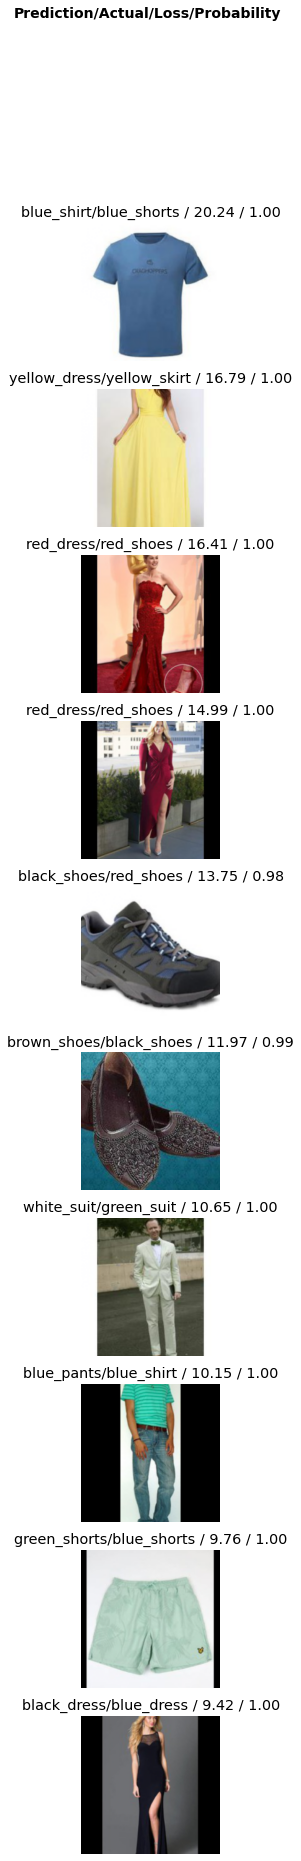

In [14]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(10, nrows=10)

In [20]:
path = Path()
path.ls(file_exts='.pkl')
learn_inf = load_learner(path/'export.pkl')

In [23]:
from fastai.vision.widgets import *
cleaner = ImageClassifierCleaner(learn)
cleaner

FileNotFoundError: Caught FileNotFoundError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/home/ubuntu/miniconda3/lib/python3.8/site-packages/torch/utils/data/_utils/worker.py", line 202, in _worker_loop
    data = fetcher.fetch(index)
  File "/home/ubuntu/miniconda3/lib/python3.8/site-packages/torch/utils/data/_utils/fetch.py", line 34, in fetch
    data = next(self.dataset_iter)
  File "/home/ubuntu/miniconda3/lib/python3.8/site-packages/fastai/data/load.py", line 118, in create_batches
    yield from map(self.do_batch, self.chunkify(res))
  File "/home/ubuntu/miniconda3/lib/python3.8/site-packages/fastcore/basics.py", line 216, in chunked
    res = list(itertools.islice(it, chunk_sz))
  File "/home/ubuntu/miniconda3/lib/python3.8/site-packages/fastai/data/load.py", line 133, in do_item
    try: return self.after_item(self.create_item(s))
  File "/home/ubuntu/miniconda3/lib/python3.8/site-packages/fastai/data/load.py", line 140, in create_item
    if self.indexed: return self.dataset[s or 0]
  File "/home/ubuntu/miniconda3/lib/python3.8/site-packages/fastai/data/core.py", line 333, in __getitem__
    res = tuple([tl[it] for tl in self.tls])
  File "/home/ubuntu/miniconda3/lib/python3.8/site-packages/fastai/data/core.py", line 333, in <listcomp>
    res = tuple([tl[it] for tl in self.tls])
  File "/home/ubuntu/miniconda3/lib/python3.8/site-packages/fastai/data/core.py", line 299, in __getitem__
    return self._after_item(res) if is_indexer(idx) else res.map(self._after_item)
  File "/home/ubuntu/miniconda3/lib/python3.8/site-packages/fastai/data/core.py", line 261, in _after_item
    def _after_item(self, o): return self.tfms(o)
  File "/home/ubuntu/miniconda3/lib/python3.8/site-packages/fastcore/transform.py", line 200, in __call__
    def __call__(self, o): return compose_tfms(o, tfms=self.fs, split_idx=self.split_idx)
  File "/home/ubuntu/miniconda3/lib/python3.8/site-packages/fastcore/transform.py", line 150, in compose_tfms
    x = f(x, **kwargs)
  File "/home/ubuntu/miniconda3/lib/python3.8/site-packages/fastcore/transform.py", line 73, in __call__
    def __call__(self, x, **kwargs): return self._call('encodes', x, **kwargs)
  File "/home/ubuntu/miniconda3/lib/python3.8/site-packages/fastcore/transform.py", line 83, in _call
    return self._do_call(getattr(self, fn), x, **kwargs)
  File "/home/ubuntu/miniconda3/lib/python3.8/site-packages/fastcore/transform.py", line 89, in _do_call
    return retain_type(f(x, **kwargs), x, ret)
  File "/home/ubuntu/miniconda3/lib/python3.8/site-packages/fastcore/dispatch.py", line 118, in __call__
    return f(*args, **kwargs)
  File "/home/ubuntu/miniconda3/lib/python3.8/site-packages/fastai/vision/core.py", line 110, in create
    return cls(load_image(fn, **merge(cls._open_args, kwargs)))
  File "/home/ubuntu/miniconda3/lib/python3.8/site-packages/fastai/vision/core.py", line 85, in load_image
    im = Image.open(fn)
  File "/home/ubuntu/miniconda3/lib/python3.8/site-packages/PIL/Image.py", line 2912, in open
    fp = builtins.open(filename, "rb")
FileNotFoundError: [Errno 2] No such file or directory: '/home/ubuntu/clothing_classification/apparel-dataset/blue_shorts/196.jpg'


In [22]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()

for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [26]:
show_image(fns[0])

IndexError: tuple index out of range

In [24]:
fns = get_image_files(path)

In [53]:
from fastai.vision import *

In [85]:
failed = []
preds = []
for i in range(1000):
    pred = learn_inf.predict(fns[i])
    actual = parent_label(fns[i])
    if pred[0] != actual:
        failed.append(fns[i])
        preds.append(pred)
        #Image.open(fns[0])


In [89]:
print(len(preds))
for i in range(len(preds)):
    print(preds[i][0])
    Image.open(failed[i])

5
yellow_dress
yellow_dress
yellow_skirt
red_hoodie
red_hoodie


apparel-dataset/pink_skirt/000465.jpg
apparel-dataset/pink_skirt/000371.jpg


In [67]:
from PIL import Image